In [20]:
import requests
import re
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Extracting content 

In [21]:
Mobile_name=[]
Price=[]
Rating=[]
Spec=[]


for i in range(1,25):
    start_time=time.time()
    url=f"https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=TRENDING&suggestionId=mobiles&requestId=155dfe24-ff64-42c2-b0a4-8529a1becc73&page={i}"
    content=requests.get(url)
    page=content.text
    soup=BeautifulSoup(page)
    
    for x in soup.find_all("div",attrs={"class":"_3pLy-c row"}):
        name=x.find("div",attrs={"class":"_4rR01T"})
        price=x.find("div",attrs={"class":"_30jeq3 _1_WHN1"})
        rating=x.find("div",attrs={"class":"_3LWZlK"})
        spec=x.find("ul",attrs={"class":"_1xgFaf"})
        
        
        if name is None:
            Mobile_name.append(np.NaN)
        else:
            Mobile_name.append(name.text)
        if price is None:
            Price.append(np.NaN)
        else:
            Price.append(price.text)
        if rating is None:
            Rating.append(np.NaN)
        else:
            Rating.append(rating.text)
        if spec is None:
            Spec.append(np.NaN)
        else:
            Spec.append(spec.text)
            
    end_time=time.time()
    print("Status={} and Time={}".format(content.status_code,end_time-start_time))
    time.sleep(1)
        

Status=200 and Time=1.1344139575958252
Status=200 and Time=1.269219160079956
Status=200 and Time=1.1626267433166504
Status=200 and Time=1.5590457916259766
Status=200 and Time=1.0770490169525146
Status=200 and Time=1.255424976348877
Status=200 and Time=1.095062494277954
Status=200 and Time=1.2510714530944824
Status=200 and Time=1.3530774116516113
Status=200 and Time=1.3000743389129639
Status=200 and Time=1.3770787715911865
Status=200 and Time=1.2250699996948242
Status=200 and Time=1.0640606880187988
Status=200 and Time=1.2260699272155762
Status=200 and Time=0.9990570545196533
Status=200 and Time=1.1240642070770264
Status=200 and Time=1.180067539215088
Status=200 and Time=1.2680726051330566
Status=200 and Time=1.0850622653961182
Status=200 and Time=1.2090692520141602
Status=200 and Time=1.1300644874572754
Status=200 and Time=0.957054615020752
Status=200 and Time=1.2138581275939941
Status=200 and Time=0.9828016757965088


In [22]:
print(len(Mobile_name))
print(len(Rating))
print(len(Price))
print(len(Spec))



576
576
576
576


In [23]:
data={"Mobile_name":Mobile_name,
      "Price":Price,
      "Rating":Rating,
      "Spec":Spec}

In [24]:
df=pd.DataFrame(data)

In [25]:
df

,Mobile_name,Price,Rating,Spec
0,"realme C20 (Cool Grey, 32 GB)","₹6,799",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
1,"REDMI Note 9 (Aqua Green, 64 GB)","₹10,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
2,"realme C20 (Cool Blue, 32 GB)","₹6,799",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
3,"I Kall K4 (Red, 16 GB)","₹4,399",3.3,2 GB RAM | 16 GB ROM13.97 cm (5.5 inch) Displa...
4,"POCO M3 (Power Black, 128 GB)","₹11,999",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
...,...,...,...,...
571,I Kall K 18 NEW,₹999,3.6,32 MB RAM | 32 MB/64 MB ROM6.1 cm (2.4 inch) D...
572,"Redmi Note 9 Pro (Glacier White, 64 GB)","₹15,990",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
573,Good One 5605N,₹849,3.7,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB4...
574,Itel Ace Young,₹749,4,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB4.5...


In [26]:
df.to_csv("F:/data science/webscrapping project details/df.csv",index=False)

In [27]:
data=pd.read_csv("F:/data science/webscrapping project details/df.csv")

In [28]:
data

,Mobile_name,Price,Rating,Spec
0,"realme C20 (Cool Grey, 32 GB)","₹6,799",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
1,"REDMI Note 9 (Aqua Green, 64 GB)","₹10,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
2,"realme C20 (Cool Blue, 32 GB)","₹6,799",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
3,"I Kall K4 (Red, 16 GB)","₹4,399",3.3,2 GB RAM | 16 GB ROM13.97 cm (5.5 inch) Displa...
4,"POCO M3 (Power Black, 128 GB)","₹11,999",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
...,...,...,...,...
571,I Kall K 18 NEW,₹999,3.6,32 MB RAM | 32 MB/64 MB ROM6.1 cm (2.4 inch) D...
572,"Redmi Note 9 Pro (Glacier White, 64 GB)","₹15,990",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
573,Good One 5605N,₹849,3.7,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB4...
574,Itel Ace Young,₹749,4.0,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB4.5...


# Cleaning the Data

## Finding null values

In [29]:
data["Spec"].isnull().sum()     

0

In [30]:
data["Rating"].isnull().sum()

3

In [31]:
data["Mobile_name"].isnull().sum()

0

In [32]:
data["Price"].isnull().sum()

0

In [33]:
data.head(2)

,Mobile_name,Price,Rating,Spec
0,"realme C20 (Cool Grey, 32 GB)","₹6,799",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
1,"REDMI Note 9 (Aqua Green, 64 GB)","₹10,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...


## Extracting data using Regular Expressions

In [34]:
data["Price"]=data["Price"].apply(lambda x:str(x).replace("₹","").replace(",",""))

In [35]:
pattern=re.compile(r"\d+\s[GB|MB]+\sRAM")   #pattern for RAM

In [36]:
data["RAM"]=data["Spec"].apply(lambda x: np.NaN if pattern.search(x) is None else pattern.search(x).group())

In [37]:
data["RAM"]=data["RAM"].apply(lambda x: str(x).replace("RAM",""))

In [38]:
pattern=re.compile(r"\d+\s[GB|MB]+\sROM")   #pattern for ROM

In [39]:
data["ROM"]=data["Spec"].apply(lambda x: np.NaN if pattern.search(x) is None else pattern.search(x).group())

In [40]:
data["ROM"]=data["ROM"].apply(lambda x: str(x).replace("ROM",""))

In [41]:
data.head(2)

,Mobile_name,Price,Rating,Spec,RAM,ROM
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4 GB,64 GB


In [42]:
pattern=re.compile("\d+MP\s[\+\s\dMP]+|\d+MP\sRear")    #pattern for Rear cam

In [43]:
data["Rearcam1"]=data["Spec"].apply(lambda x: np.NaN if pattern.search(x) is None else pattern.search(x).group()) #searching pattern

In [44]:
data["Rearcam1"].isnull().sum()

36

In [45]:
data["Rearcam1"].fillna("0",inplace=True)   #filling null values

In [46]:
pattern=re.compile("^\d+")    #Again extracting desired Rearcamera pixel
data["Rearcam(MP)"]=data["Rearcam1"].apply(lambda x: np.NaN if pattern.search(x) is None else pattern.search(x).group())

In [47]:
data.head(2)

,Mobile_name,Price,Rating,Spec,RAM,ROM,Rearcam1,Rearcam(MP)
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB,8MP Rear,8
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4 GB,64 GB,48MP + 8MP + 2MP + 2MP,48


In [48]:
data.drop("Rearcam1",axis=1,inplace=True)  #dropping unwanted columns

In [49]:
pattern=re.compile("\d+MP\sFront\sCamera")    #pattern for frontcam

In [50]:
data["FrontCam(MP)"]=data["Spec"].apply(lambda x: np.NaN if pattern.search(x) is None else pattern.search(x).group())

In [51]:
data["FrontCam(MP)"]=data["FrontCam(MP)"].apply(lambda x: str(x).replace("MP Front Camera",""))

In [52]:
data.head(2)

,Mobile_name,Price,Rating,Spec,RAM,ROM,Rearcam(MP),FrontCam(MP)
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB,8,5
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4 GB,64 GB,48,13


In [53]:
pattern=re.compile(r"^\w+")    #pattern for Brand

In [54]:
data["Brand"]=data["Mobile_name"].apply(lambda x: pattern.search(x).group())   #searching for Brand

In [55]:
data["Brand"].isnull().sum()    #checking for null values

0

In [56]:
data.head(2)

,Mobile_name,Price,Rating,Spec,RAM,ROM,Rearcam(MP),FrontCam(MP),Brand
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB,8,5,realme
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4 GB,64 GB,48,13,REDMI


In [57]:
pattern=re.compile(r"\(\D+,")      #pattern for colour
data["Colour"]=data["Mobile_name"].apply(lambda x: np.NaN if pattern.search(x) is None else pattern.search(x).group())

In [58]:
data.head(2)

,Mobile_name,Price,Rating,Spec,RAM,ROM,Rearcam(MP),FrontCam(MP),Brand,Colour
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB,8,5,realme,"(Cool Grey,"
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4 GB,64 GB,48,13,REDMI,"(Aqua Green,"


In [59]:
data["Colour"]=data["Colour"].apply(lambda x:str(x).replace("(","").replace(",",""))

In [60]:
data.head(3)

,Mobile_name,Price,Rating,Spec,RAM,ROM,Rearcam(MP),FrontCam(MP),Brand,Colour
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB,8,5,realme,Cool Grey
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4 GB,64 GB,48,13,REDMI,Aqua Green
2,"realme C20 (Cool Blue, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB,8,5,realme,Cool Blue


In [61]:
pattern=re.compile(r"\d+\smAh")   #pattern for Battery

In [62]:
data["Battery"]=data["Spec"].apply(lambda x : np.NaN if pattern.search(x) is None else pattern.search(x).group())

In [63]:
data["Battery"]=data["Battery"].apply(lambda x: str(x).replace("mAh",""))

In [64]:
data.head(2)

,Mobile_name,Price,Rating,Spec,RAM,ROM,Rearcam(MP),FrontCam(MP),Brand,Colour,Battery
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB,8,5,realme,Cool Grey,5000
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4 GB,64 GB,48,13,REDMI,Aqua Green,5020


In [65]:
pattern=re.compile("\d+\.\d+\sinch")  #pattern for screen size

In [66]:
data["Screensize"]=data["Spec"].apply(lambda x : np.NaN if pattern.search(x) is None else pattern.search(x).group())

In [67]:
data["Screensize"]=data["Screensize"].apply(lambda x: str(x).replace("inch",""))

In [68]:
data.head(2)

,Mobile_name,Price,Rating,Spec,RAM,ROM,Rearcam(MP),FrontCam(MP),Brand,Colour,Battery,Screensize
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB,8,5,realme,Cool Grey,5000,6.5
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4 GB,64 GB,48,13,REDMI,Aqua Green,5020,6.53


In [69]:
pattern=re.compile(r"Battery([\w\s]+)\sProcessor")     #pattern for Processor

In [70]:
data["Processor"]=data["Spec"].apply(lambda x: np.NaN if pattern.search(x) is None else re.findall(pattern,x))

In [71]:
data["Processor"].isnull().sum()

281

In [72]:
data.head(2)

,Mobile_name,Price,Rating,Spec,RAM,ROM,Rearcam(MP),FrontCam(MP),Brand,Colour,Battery,Screensize,Processor
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,2 GB,32 GB,8,5,realme,Cool Grey,5000,6.5,[MediaTek Helio G35]
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4 GB,64 GB,48,13,REDMI,Aqua Green,5020,6.53,[MediaTek Helio G85]


In [73]:
data.drop("Spec",axis=1,inplace=True)

In [74]:
data.to_csv("F:/data science/webscrapping project details/data1.csv",index=False)

In [75]:
data2=pd.read_csv("F:/data science/webscrapping project details/data1.csv")

In [76]:
data2.head(2)

,Mobile_name,Price,Rating,RAM,ROM,Rearcam(MP),FrontCam(MP),Brand,Colour,Battery,Screensize,Processor
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB,32 GB,8,5.0,realme,Cool Grey,5000.0,6.50,['MediaTek Helio G35']
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB,64 GB,48,13.0,REDMI,Aqua Green,5020.0,6.53,['MediaTek Helio G85']


# Exploratory Data Analysis

### Loading Data

In [77]:
data=pd.read_csv("F:/data science/webscrapping project details/data1.csv")

In [78]:
data.shape

(576, 12)

In [79]:
data.columns

Index(['Mobile_name', 'Price', 'Rating', 'RAM', 'ROM', 'Rearcam(MP)',
       'FrontCam(MP)', 'Brand', 'Colour', 'Battery', 'Screensize',
       'Processor'],
      dtype='object')

In [87]:
data.dtypes

Mobile_name      object
Price             int64
Rating          float64
RAM              object
ROM              object
Rearcam(MP)       int64
FrontCam(MP)     object
Brand            object
Colour           object
Battery         float64
Screensize      float64
Processor        object
dtype: object

In [90]:
data["FrontCam(MP)"]=data["FrontCam(MP)"].astype("float64")

In [143]:
data

,Mobile_name,Price,Rating,RAM,ROM,Rearcam(MP),FrontCam(MP),Brand,Colour,Battery,Screensize,Processor
0,"realme C20 (Cool Grey, 32 GB)",6799,4.4,2 GB,32 GB,8,5.0,realme,Cool Grey,5000.0,6.50,['MediaTek Helio G35']
1,"REDMI Note 9 (Aqua Green, 64 GB)",10999,4.3,4 GB,64 GB,48,13.0,REDMI,Aqua Green,5020.0,6.53,['MediaTek Helio G85']
2,"realme C20 (Cool Blue, 32 GB)",6799,4.4,2 GB,32 GB,8,5.0,realme,Cool Blue,5000.0,6.50,['MediaTek Helio G35']
3,"I Kall K4 (Red, 16 GB)",4399,3.3,2 GB,16 GB,5,2.0,I,Red,2500.0,5.50,not specified
4,"POCO M3 (Power Black, 128 GB)",11999,4.3,6 GB,128 GB,48,8.0,POCO,Power Black,6000.0,6.53,['Qualcomm Snapdragon 662']
...,...,...,...,...,...,...,...,...,...,...,...,...
571,I Kall K 18 NEW,999,3.6,32 MB,64 MB,3,0.0,I,Black,2500.0,2.40,not specified
572,"Redmi Note 9 Pro (Glacier White, 64 GB)",15990,4.4,4 GB,64 GB,48,16.0,Redmi,Glacier White,5020.0,6.67,not specified
573,Good One 5605N,849,3.7,32 MB,32 MB,2,0.0,Good,Black,2500.0,1.80,not specified
574,Itel Ace Young,749,4.0,4 MB,4 MB,0,0.0,Itel,Black,1000.0,1.80,not specified


## Handling missing values

In [82]:
data.isnull().sum()    #finding missing values

Mobile_name       0
Price             0
Rating            3
RAM              16
ROM              10
Rearcam(MP)       0
FrontCam(MP)    241
Brand             0
Colour          213
Battery           5
Screensize        2
Processor       281
dtype: int64

In [9]:
(data.isnull().sum()/data.shape[0])*100      # proportion of missing values

Mobile_name          0.000000
Price                0.173611
Rating               0.000000
RAM                  3.645833
ROM                  1.215278
Rearcam(MP)          0.000000
FrontCam(MP)         0.000000
Brand                0.000000
Colour               0.000000
Battery(mAh)         0.000000
Screensize(inch)     0.694444
Processor           42.361111
dtype: float64

## Filling null values

In [83]:
data["FrontCam(MP)"].fillna("0",inplace=True)

In [84]:
data["Colour"].fillna("Black",inplace=True)

   ## Univariant Analysis

### Continuous columns

In [92]:
count_col=data.select_dtypes(["float64","int64"]).columns

In [93]:
count_col

Index(['Price', 'Rating', 'Rearcam(MP)', 'FrontCam(MP)', 'Battery',
       'Screensize'],
      dtype='object')

In [94]:
data[count_col].describe()

,Price,Rating,Rearcam(MP),FrontCam(MP),Battery,Screensize
count,576.000000,573.000000,576.000000,576.000000,571.000000,574.000000
mean,8971.463542,4.115881,21.531250,6.654514,3608.992995,4.846906
std,8028.771547,0.325129,24.558128,8.074248,1888.844581,2.192552
min,669.000000,3.000000,0.000000,0.000000,400.000000,0.660000
25%,1449.000000,4.000000,3.000000,0.000000,1500.000000,2.400000
50%,7999.000000,4.200000,13.000000,5.000000,4230.000000,6.400000
75%,13992.250000,4.300000,48.000000,8.000000,5000.000000,6.520000
max,49999.000000,4.600000,108.000000,44.000000,7000.000000,7.120000


## Histogram

### Price Analysis

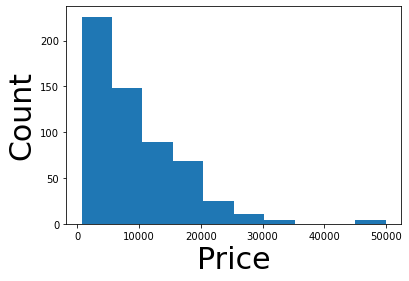

In [95]:
plt.figure()
plt.hist(data["Price"])
plt.xlabel("Price",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Observation: There are more number of mobiles with price less than 5000 and very less mobiles with price more than 30,000

### Rating Analysis

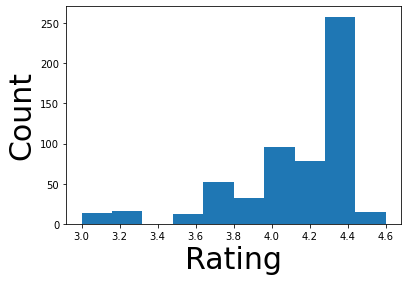

In [96]:
plt.figure()
plt.hist(data["Rating"])
plt.xlabel("Rating",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Observation:There are more number of ratings between 4 to 4.5

### Rearcamera Analysis

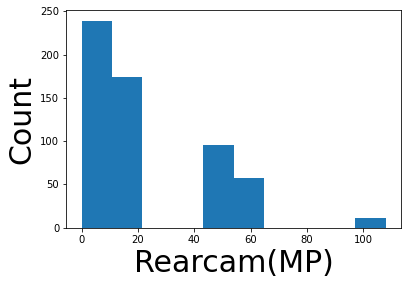

In [97]:
plt.figure()
plt.hist(data["Rearcam(MP)"])
plt.xlabel("Rearcam(MP)",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Obsevation:There are more number of mobiles with 0-20 Megapixel and less number with 40-60 MP and very few with Rearcam around 100 MP

### Frontcamera analysis

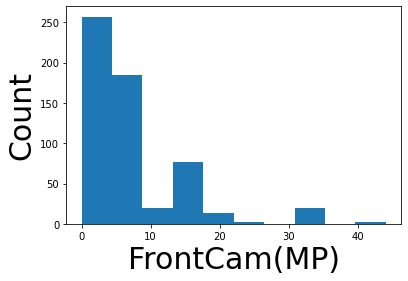

In [98]:
plt.figure()
plt.hist(data["FrontCam(MP)"])
plt.xlabel("FrontCam(MP)",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Obsevation:There are more mobiles with no Front cam and front cam with less than 10 Megapixcel.
###  There are less number of mobiles(almost less than 10) with Front camera more than 40 Megapixcel.

### Battery Analysis

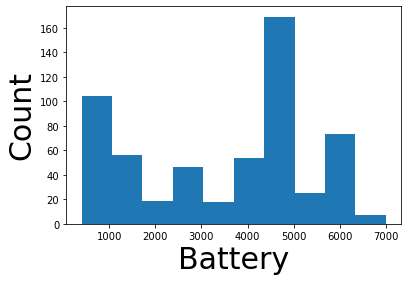

In [100]:
plt.figure()
plt.hist(data["Battery"])
plt.xlabel("Battery",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Observation:There are more number of mobiles with battery capacity 5000(mAh).And very few with 6000-7000(mAh)
 

### Screensize Analysis

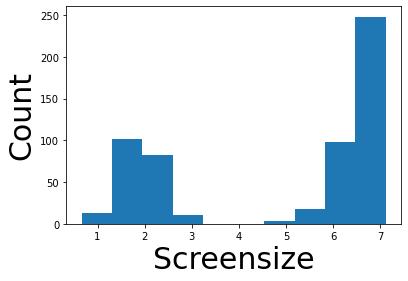

In [102]:
plt.figure()
plt.hist(data["Screensize"])
plt.xlabel("Screensize",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Observation:There are more number of mobiles with Screensize 6-7 inches.Around 100 mobiles are having screensize 1-2.5 inches.

###  Categorial column

In [103]:
count_col=data.select_dtypes(["object"]).columns

In [104]:
count_col

Index(['Mobile_name', 'RAM', 'ROM', 'Brand', 'Colour', 'Processor'], dtype='object')

## Barplot

### Brand Analysis for top 10 mobiles

In [159]:
df=data['Brand'].value_counts().iloc[:10].index

In [161]:
df

Index(['IKall', 'realme', 'OPPO', 'SAMSUNG', 'REDMI', 'LAVA', 'POCO', 'Itel',
       'Infinix', 'Kechaoda'],
      dtype='object')

In [157]:
data.loc[data["Brand"]=="IKall",:]

,Mobile_name,Price,Rating,RAM,ROM,Rearcam(MP),FrontCam(MP),Brand,Colour,Battery,Screensize,Processor
3,"I Kall K4 (Red, 16 GB)",4399,3.3,2 GB,16 GB,5,2.0,IKall,Red,2500.0,5.50,not specified
7,"I Kall K380 (Blue, 32 GB)",6599,3.0,4 GB,32 GB,13,8.0,IKall,Blue,3600.0,7.12,not specified
11,I Kall K33 Combo of Two Mobiles,1599,3.7,32 MB,64 MB,3,0.0,IKall,Black,1500.0,2.40,not specified
15,I Kall K33 New Combo of Two,1599,3.7,32 MB,32 MB,3,0.0,IKall,Black,1500.0,2.40,not specified
51,"I Kall K4 (Red, 16 GB)",4399,3.3,2 GB,16 GB,5,2.0,IKall,Red,2500.0,5.50,not specified
...,...,...,...,...,...,...,...,...,...,...,...,...
555,"I Kall K4 (Red, 16 GB)",4399,3.3,2 GB,16 GB,5,2.0,IKall,Red,2500.0,5.50,not specified
559,"I Kall K380 (Blue, 32 GB)",6599,3.0,4 GB,32 GB,13,8.0,IKall,Blue,3600.0,7.12,not specified
563,I Kall K33 Combo of Two Mobiles,1599,3.7,32 MB,64 MB,3,0.0,IKall,Black,1500.0,2.40,not specified
567,I Kall K33 New Combo of Two,1599,3.7,32 MB,32 MB,3,0.0,IKall,Black,1500.0,2.40,not specified


In [155]:
data.loc[data["Brand"]=="I","Brand"]="IKall"

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



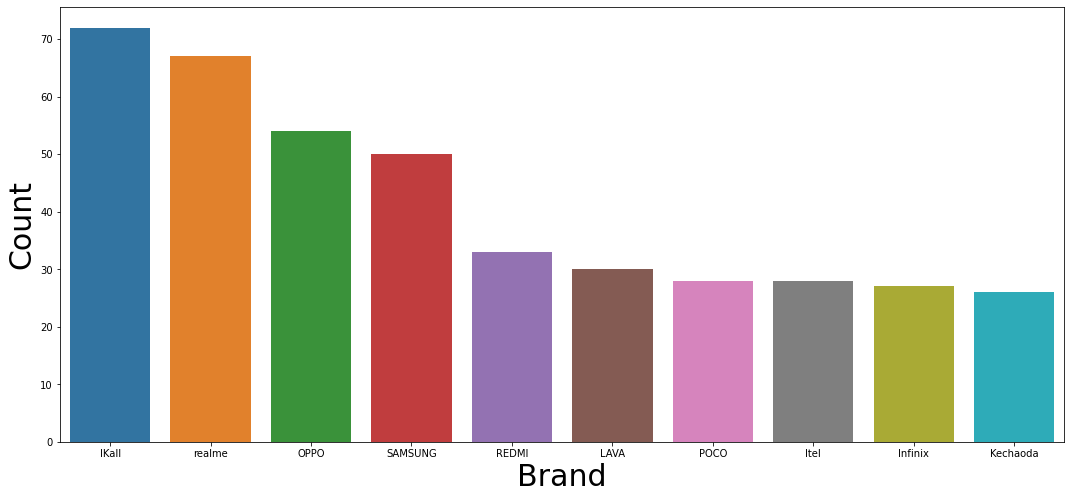

In [162]:
plt.figure(figsize=(18,8))
sns.countplot(data['Brand'], order=df)
plt.xlabel("Brand",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Observation:IKall Brand mobiles are high in number(80+) and least Kechaoda Brand mobiles(20+)

### RAM Analysis

In [107]:
df=data["RAM"].value_counts()[:10].index

In [108]:
df

Index(['32 MB ', '4 GB ', '6 GB ', '8 GB ', '2 GB ', '3 GB ', '4 MB ', '8 MB ',
       '24 MB ', '64 MB '],
      dtype='object')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



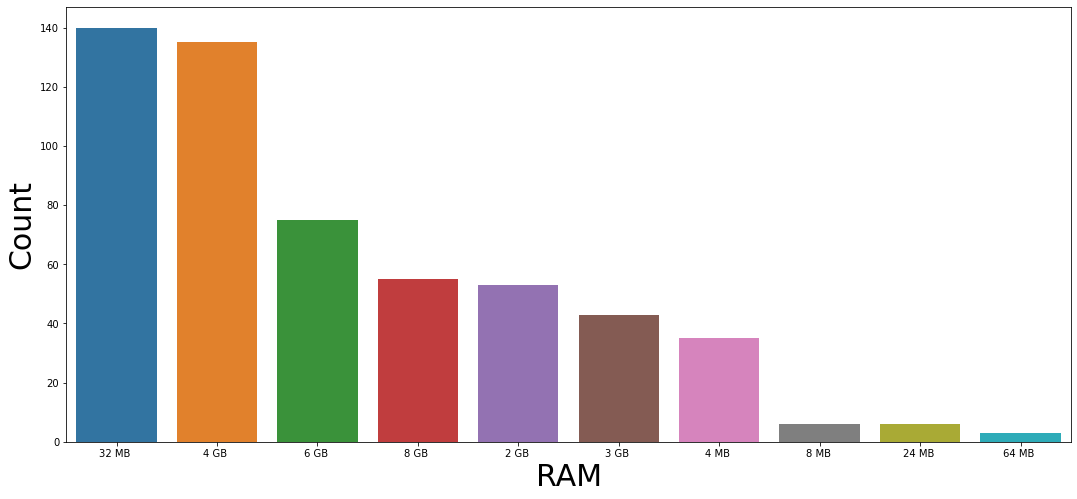

In [109]:
plt.figure(figsize=(18,8))
sns.countplot(data["RAM"], order=df)
plt.xlabel("RAM",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Observation:Mobiles with 32MB RAM are higher in number(120+)  and mobiles with 64MB are lesser(less than 10)

### ROM Analysis

In [110]:
df=data["ROM"].value_counts().iloc[:10].index

In [111]:
df

Index(['128 GB ', '64 GB ', '32 MB ', '32 GB ', '64 MB ', '4 MB ', '16 GB ',
       '24 MB ', '256 GB ', '16 MB '],
      dtype='object')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



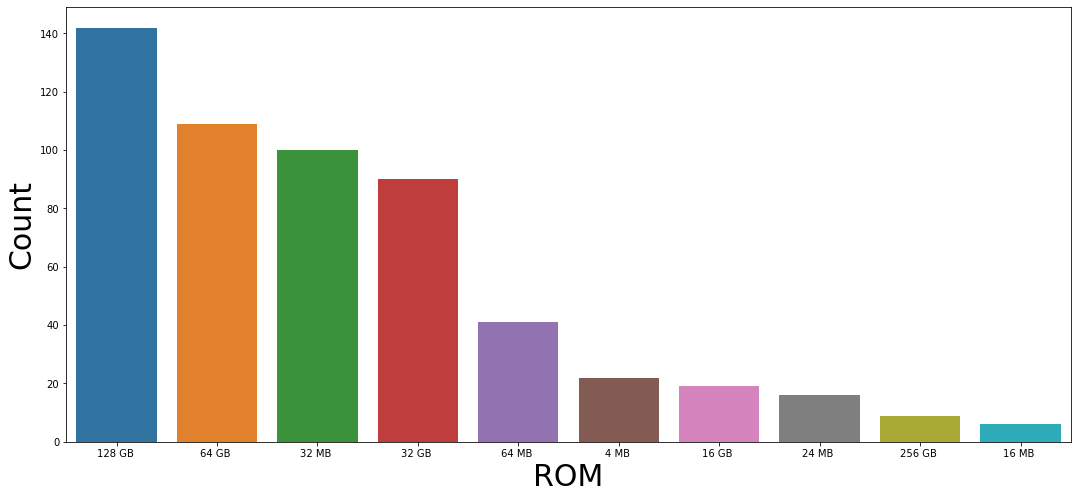

In [112]:
plt.figure(figsize=(18,8))
sns.countplot(data["ROM"], order=df)
plt.xlabel("ROM",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Observation:Mobiles with 128GB ROM are more in number(160) and  Mobiles with 16MB are less in number(less than 10)

### Colour Analysis

In [113]:
df=data["Colour"].value_counts()[:10].index

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



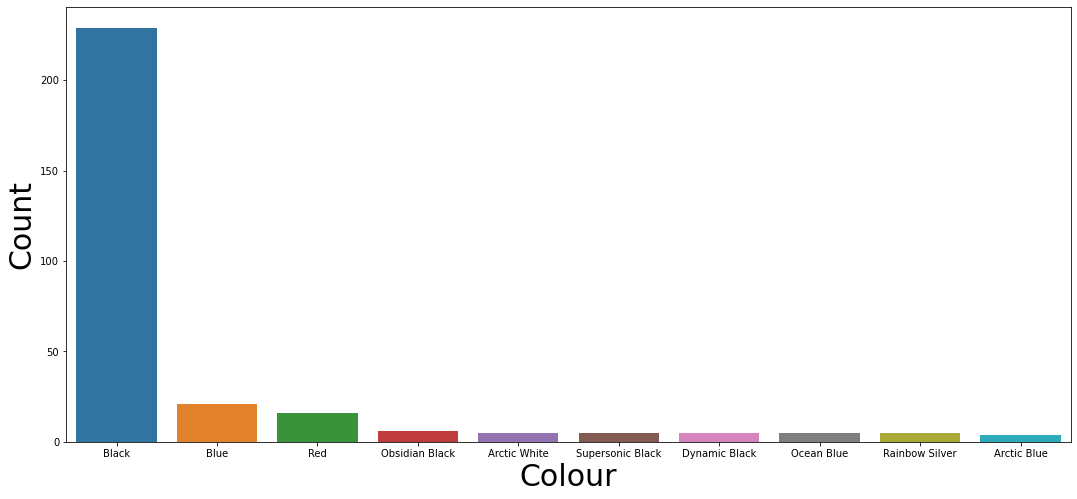

In [114]:
plt.figure(figsize=(18,8))
sns.countplot(data["Colour"], order=df)
plt.xlabel("Colour",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Observation:Maximum number of mobiles are having Black colour and rest all mobiles are having random colours

### Analysis for Processor

In [115]:
data["Processor"].isnull().sum()

281

In [116]:
data["Processor"].fillna("not specified",inplace=True)

In [117]:
df=data["Processor"].value_counts()[:10].index

In [118]:
df

Index(['not specified', '['MediaTek Helio G85']',
       '['Qualcomm Snapdragon 720G']', '['MediaTek Helio P35']',
       '['MediaTek Helio G80']', '['Qualcomm Snapdragon 662']',
       '['MediaTek Helio G25']', '['MediaTek Helio G95']',
       '['Mediatek Helio G35']', '['MediaTek Helio G35']'],
      dtype='object')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



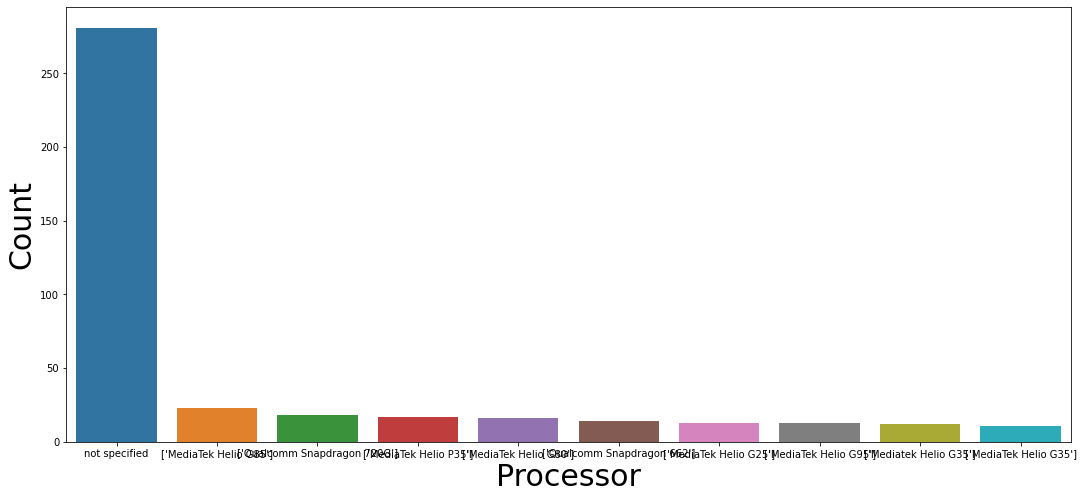

In [119]:
plt.figure(figsize=(18,8))
sns.countplot(data["Processor"], order=df)
plt.xlabel("Processor",fontsize="30")
plt.ylabel("Count",fontsize="30")
plt.show()

### Observation:Maximum no.of mobiles din't specify their Processor type.But mobiles which specify max are having MediaTekHelioG85 Processor

## Bivariant analysis

### Continuous columns

In [120]:
count_col=data.select_dtypes(["float64","int64"])

In [121]:
count_col

,Price,Rating,Rearcam(MP),FrontCam(MP),Battery,Screensize
0,6799,4.4,8,5.0,5000.0,6.50
1,10999,4.3,48,13.0,5020.0,6.53
2,6799,4.4,8,5.0,5000.0,6.50
3,4399,3.3,5,2.0,2500.0,5.50
4,11999,4.3,48,8.0,6000.0,6.53
...,...,...,...,...,...,...
571,999,3.6,3,0.0,2500.0,2.40
572,15990,4.4,48,16.0,5020.0,6.67
573,849,3.7,2,0.0,2500.0,1.80
574,749,4.0,0,0.0,1000.0,1.80


In [122]:
corr=data.corr()

In [123]:
corr

,Price,Rating,Rearcam(MP),FrontCam(MP),Battery,Screensize
Price,1.000000,0.513887,0.745077,0.722334,0.740160,0.709451
Rating,0.513887,1.000000,0.414198,0.388000,0.509329,0.383811
Rearcam(MP),0.745077,0.414198,1.000000,0.715205,0.619961,0.596418
FrontCam(MP),0.722334,0.388000,0.715205,1.000000,0.642376,0.625940
Battery,0.740160,0.509329,0.619961,0.642376,1.000000,0.923291
Screensize,0.709451,0.383811,0.596418,0.625940,0.923291,1.000000


<AxesSubplot:>

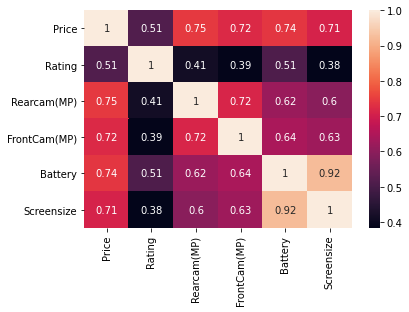

In [124]:
sns.heatmap(corr,annot=True)

### Observation: Only battery and Screensize columns are related.

### Price vs Rating

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



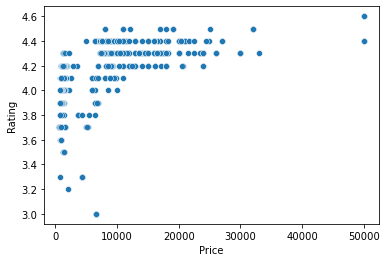

In [125]:
plt.figure()
sns.scatterplot(data["Price"],data["Rating"])
plt.show()

### Observation:Ratings are more for mobiles of price 10k to 25k.and maximum ratings are in between 4 to 4.5

### Price vs Rearcamera

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Rearcam(MP)', ylabel='Price'>

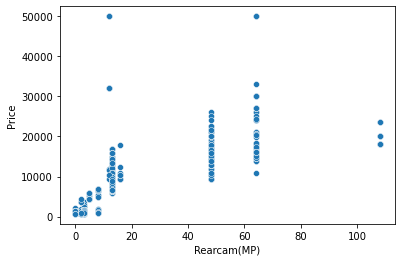

In [126]:
sns.scatterplot(data["Rearcam(MP)"],data["Price"])

### Observation:Mobiles with Rearcamear 12MP are under 20k and mobiles with around 50MP are ranging from 10k to 25k and some mobiles with greater than 50MP are ranging from 10k to 30k.

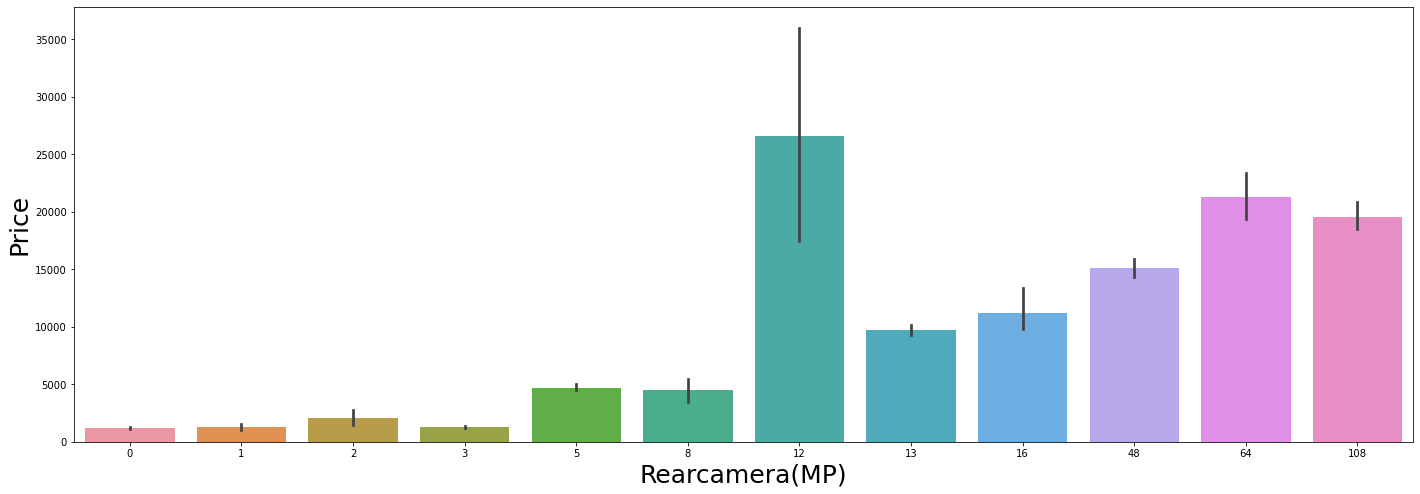

In [127]:
plt.figure(figsize=(24,8))
sns.barplot(x="Rearcam(MP)",y="Price",data=data)
plt.xlabel("Rearcamera(MP)",fontsize=25)
plt.ylabel("Price",fontsize=25)
plt.show()

### Price vs Frontcamera

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='FrontCam(MP)', ylabel='Price'>

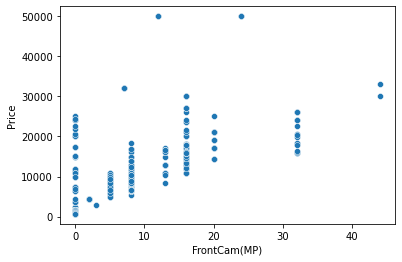

In [128]:
sns.scatterplot(data["FrontCam(MP)"],data["Price"])

### Observation:Most of the mobiles dont have Front camera.Mobiles having 8MP and 18MP are ranging from 8k to 30k price.There are mobiles which are having 32MP and price ranging from 15 to25k

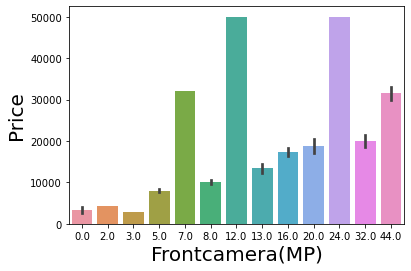

In [129]:
plt.figure()
sns.barplot(x="FrontCam(MP)",y="Price",data=data)
plt.xlabel("Frontcamera(MP)",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.show()

### Price vs Battery

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Battery', ylabel='Price'>

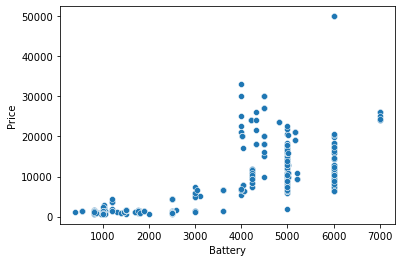

In [131]:
sns.scatterplot(data["Battery"],data["Price"])

### Observation:Mobiles with 5000  and 6000 battery  are more and their price vary from 5k to 20k and 6k to 20k

### Price vs Screensize

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Screensize', ylabel='Price'>

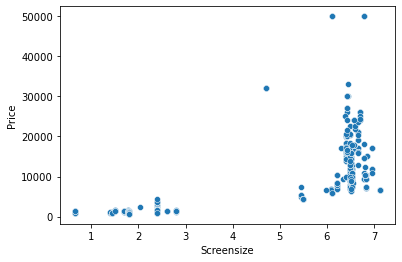

In [132]:
sns.scatterplot(data["Screensize"],data["Price"])

### Observation: More number of mobiles are having Screensize in between 6 to 7 inches and their price vary from 5k to 30k.As the Screensize increases price also increases.

### Categorial column

In [133]:
count_col=data.select_dtypes(["object"])

In [134]:
count_col

,Mobile_name,RAM,ROM,Brand,Colour,Processor
0,"realme C20 (Cool Grey, 32 GB)",2 GB,32 GB,realme,Cool Grey,['MediaTek Helio G35']
1,"REDMI Note 9 (Aqua Green, 64 GB)",4 GB,64 GB,REDMI,Aqua Green,['MediaTek Helio G85']
2,"realme C20 (Cool Blue, 32 GB)",2 GB,32 GB,realme,Cool Blue,['MediaTek Helio G35']
3,"I Kall K4 (Red, 16 GB)",2 GB,16 GB,I,Red,not specified
4,"POCO M3 (Power Black, 128 GB)",6 GB,128 GB,POCO,Power Black,['Qualcomm Snapdragon 662']
...,...,...,...,...,...,...
571,I Kall K 18 NEW,32 MB,64 MB,I,Black,not specified
572,"Redmi Note 9 Pro (Glacier White, 64 GB)",4 GB,64 GB,Redmi,Glacier White,not specified
573,Good One 5605N,32 MB,32 MB,Good,Black,not specified
574,Itel Ace Young,4 MB,4 MB,Itel,Black,not specified


### Price vs Brand

### Maximum price of each Brand

<AxesSubplot:xlabel='Brand'>

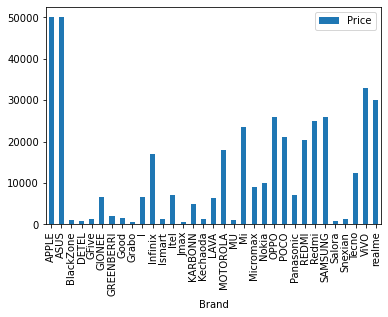

In [135]:
data.groupby("Brand").agg({"Price":"max"}).plot.bar()

### Observation:Apple and Asus mobiles maximum price is 50k and next comes Vivo with max price 35k and realme mobiles max price is 30k.

In [136]:
px.box(data,x="Price",color="Brand")

### Observation:Redmi mobiles  price vary from 7k to 22k and Apple phone is having maximum price around 50k and Samsung mobiles vary from 2k to 30k and so on .

### Price vs Processor

In [137]:
px.box(data,x=data["Price"],color=data["Processor"])

### Multivariant Analysis

### Continuos column

In [138]:
count_col=data.select_dtypes(["int64","float64"])

In [139]:
count_col

,Price,Rating,Rearcam(MP),FrontCam(MP),Battery,Screensize
0,6799,4.4,8,5.0,5000.0,6.50
1,10999,4.3,48,13.0,5020.0,6.53
2,6799,4.4,8,5.0,5000.0,6.50
3,4399,3.3,5,2.0,2500.0,5.50
4,11999,4.3,48,8.0,6000.0,6.53
...,...,...,...,...,...,...
571,999,3.6,3,0.0,2500.0,2.40
572,15990,4.4,48,16.0,5020.0,6.67
573,849,3.7,2,0.0,2500.0,1.80
574,749,4.0,0,0.0,1000.0,1.80


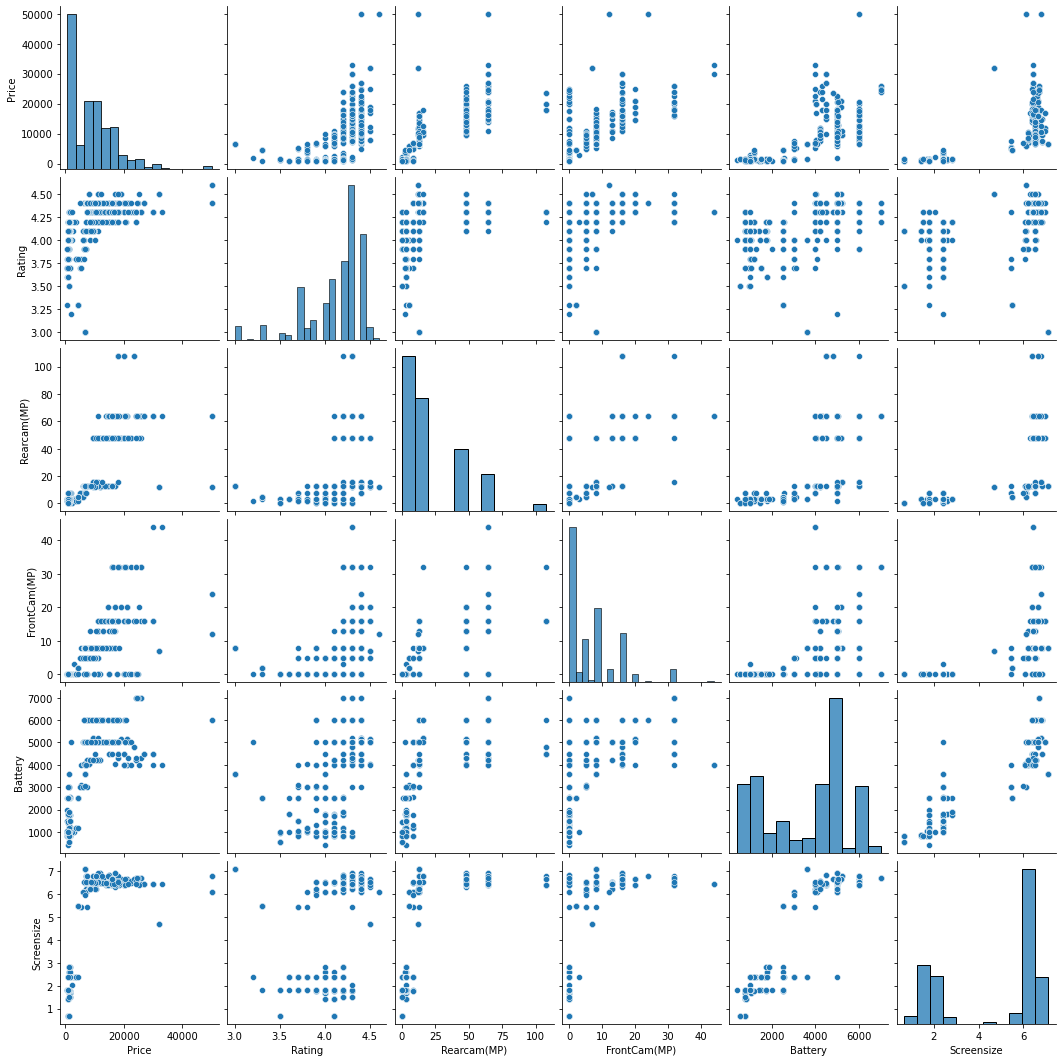

In [140]:
sns.pairplot(count_col)

### Observation:Price and Rating are slightly Linearly correlated.

In [2]:
x.keys(

dict_keys(['name', 'Place', 'corse'])

In [3]:
x.values()

dict_values(['susmitha', 'hyd', 'datascience'])

In [4]:
a=[[12,3,3,3],[1,2,3,4],[2,3,4,5]]

In [5]:
print(a)

[[12, 3, 3, 3], [1, 2, 3, 4], [2, 3, 4, 5]]
